<h3><b>1. Introduction</b></h3>
<br></br>
During the IBM Artificial Intelligence Capstone Project, I am using real datasets described below in order to analyze restaurant market in Milan, Italy. Purpose of this project is having a clear view of how the competitors market looks like for opening the italian cafeteria. <br></br>
All the steps in this data science project will be described in details. I have started with defining a business case. Other steps are data preparation (collecting, cleansing, feature engineering, etc.), data analyzing and final outputs.
<br></br>
These outputs and concolustions can be used by a stakeholder to make a decision.
<br></br>

<img src="Milano.jpg">

<b>1.1 Target Audience</b>

My target audience is coming from various groups:
1. Enterprenours who got into challenging situation due to Covid19 crisis and are looking for fresh ideas.
2. Milan citizens who are looking for a good place to eat.
3. Tourists who don't want to fall a victim of tourists food traps.
<br></br>
<br></br>

<h3><b>2. Data Preparation</b></h3>
<br></br>
<b>2.1 Data Source</b>

* https://developer.foursquare.com/docs - portal with various, categorized venues in Milan which can be rated by the customers.

<b> 2.2 Data Mining</b>
<br></br>

Foursquare will be used to get a data of venues in Milan. Venue ID, Name and Address will be used in the first part of the project. In the second part, we will merge this dataframe with "Likes" received by each venue.


<h3><b>3. Methodology</b></h3>

In below cells there is an explanation of each line of the code. Everything is explained step by step.

In [121]:
#import required libraries
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from urllib.request import urlopen
from bs4 import BeautifulSoup

print('All libraries have been imported!')

Libraries imported.


In [190]:
#Setting up an address for our project and getting geolocations
address = 'Milan, Italy'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

<ipython-input-190-ce361dd54399>:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  geolocator = Nominatim()


The geograpical coordinate of Milan are 45.4668, 9.1905.


In [191]:
#API Credentials
CLIENT_ID = 'OXOLQLCFVJW224ZOK11YCX5JR22ZEXEJHBHXTFGQE4J0ORWO'
CLIENT_SECRET = '3AP2H5LY2VVFKM1SKZSWK0PJW4IEWWSCRISM0N3BV1NSPDDA'
VERSION = 20200411

In [192]:
#Defining how many venues we want to have and what is the radius
LIMIT = 200
radius = 1000 


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [193]:
results = requests.get(url).json()

In [194]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [199]:
#Connecting to Foursquare API in order to create the dataframe with Milan venues within certain radius

venues = results['response']['groups'][0]['items']
milan_venues = json_normalize(venues)
my_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.address']
milan_venues =milan_venues.loc[:, my_columns]

# filter the category for each row
milan_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

milan_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng,venue.location.address
0,Galleria Vittorio Emanuele II,4b05887cf964a520dac822e3,Monument / Landmark,45.465577,9.190024,Piazza Del Duomo
1,Park Hyatt Milan,4b058877f964a52058c722e3,Hotel,45.465532,9.188911,Via Tommaso Grossi 1
2,Room Mate Giulia Hotel,56e8914e498ef02d677a8ea1,Hotel,45.465250,9.189396,Via silvio Pellico 4
3,Gallerie d'Italia,4ea19ac66d86c55d18a95d97,Art Gallery,45.467183,9.190056,"Piazza della Scala, 6"
4,Teatro alla Scala,4b755f6af964a520d0082ee3,Opera House,45.467027,9.189686,Via Filodrammatici 2
5,Pasticceria Marchesi,57d52948498ebceb900cf11c,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II
6,Luini,4b55fd64f964a520b7fa27e3,Bakery,45.465707,9.191431,Via Santa Radegonda 16
7,Piazza della Scala,4c9780f76b35a143cc9736dc,Plaza,45.466895,9.189881,Piazza della Scala
8,Statua a Leonardo da Vinci,4fc52da1e4b087a3e32bcdba,Monument / Landmark,45.466970,9.190010,Piazza della Scala
9,Prada,4b755db8f964a5207c082ee3,Boutique,45.465600,9.189968,Galleria Vittorio Emanuele II


In [201]:
#changing column headers to be nmore user friendly
milan_venues.columns = [col.split(".")[-1] for col in milan_venues.columns]
milan_venues

,name,id,categories,lat,lng,address
0,Galleria Vittorio Emanuele II,4b05887cf964a520dac822e3,Monument / Landmark,45.465577,9.190024,Piazza Del Duomo
1,Park Hyatt Milan,4b058877f964a52058c722e3,Hotel,45.465532,9.188911,Via Tommaso Grossi 1
2,Room Mate Giulia Hotel,56e8914e498ef02d677a8ea1,Hotel,45.465250,9.189396,Via silvio Pellico 4
3,Gallerie d'Italia,4ea19ac66d86c55d18a95d97,Art Gallery,45.467183,9.190056,"Piazza della Scala, 6"
4,Teatro alla Scala,4b755f6af964a520d0082ee3,Opera House,45.467027,9.189686,Via Filodrammatici 2
5,Pasticceria Marchesi,57d52948498ebceb900cf11c,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II
6,Luini,4b55fd64f964a520b7fa27e3,Bakery,45.465707,9.191431,Via Santa Radegonda 16
7,Piazza della Scala,4c9780f76b35a143cc9736dc,Plaza,45.466895,9.189881,Piazza della Scala
8,Statua a Leonardo da Vinci,4fc52da1e4b087a3e32bcdba,Monument / Landmark,45.466970,9.190010,Piazza della Scala
9,Prada,4b755db8f964a5207c082ee3,Boutique,45.465600,9.189968,Galleria Vittorio Emanuele II


In [202]:
#What type of categories of venues we have in our dataframe?
milan_venues['categories'].unique()

array(['Monument / Landmark', 'Hotel', 'Art Gallery', 'Opera House',
       'Pastry Shop', 'Bakery', 'Plaza', 'Boutique', 'Ice Cream Shop',
       'Coffee Shop', 'Italian Restaurant', 'Scenic Lookout',
       'Electronics Store', 'Kitchen Supply Store', 'Sandwich Place',
       'Art Museum', 'Wine Bar', 'Cocktail Bar', 'Dessert Shop',
       "Men's Store", 'Bistro', 'Jewelry Store', 'Road', 'Gift Shop',
       'Pedestrian Plaza', 'Perfume Shop', 'Cosmetics Shop', 'Bookstore',
       'Mediterranean Restaurant', 'Gourmet Shop', 'Café',
       'Japanese Restaurant', "Women's Store", 'Accessories Store',
       'Pizza Place', 'Lounge', 'Restaurant', 'Korean Restaurant',
       'Sporting Goods Shop', 'Toy / Game Store',
       'Paper / Office Supplies Store', 'Burger Joint'], dtype=object)

In [203]:
#Which categories do we want to exclude? Please note that we will be looking only at food-related venues.

remove_this = ['Monument / Landmark', 'Hotel', 'Art Gallery', 'Opera House','Plaza', 'Boutique', 'Ice Cream Shop','Bookstore',
               'Salon / Barbershop', 'Gourmet Shop', 'Art Museum', 'Clothing Store', 'Department Store','Scenic Lookout', 'Kitchen Supply Store',
               'Auditorium', "Women's Store", 'Music Store','Scenic Lookout','Electronics Store',"Men's store",'Jewelry Store','Road','Gift Shop','Pedestrian Plaza','Perfumr Shop','Cosmetic Shop','Bookstore','Gourmet Shop',"Women's Store",'Accessories Store','Sporting Goods Shop','Toy / Game Store','Paper / Office Supplies Store',"Men's Store",'Perfume Shop','Cosmetics Shop']

#nearby_venues2 = nearby_venues.copy()

milan_venues = milan_venues[~milan_venues['categories'].isin(remove_this)]
milan_venues

#Kept just food-related venues in Milan

,name,id,categories,lat,lng,address
5,Pasticceria Marchesi,57d52948498ebceb900cf11c,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II
6,Luini,4b55fd64f964a520b7fa27e3,Bakery,45.465707,9.191431,Via Santa Radegonda 16
12,Lavazza Coffee Design,59c2232bd48ec17dd4178369,Coffee Shop,45.466274,9.190975,"Piazza San Fedele, 2"
13,VUN Andrea Aprea,527bc504498e6c357bdbb35e,Italian Restaurant,45.465290,9.189133,Via Silvio Pellico 3
17,Ristorante Trussardi alla Scala,4bfe3e7755539c74bacfbcf3,Italian Restaurant,45.467036,9.189512,Piazza della Scala 5
23,Panini Durini,5485c0d7498e225e0587b79b,Sandwich Place,45.465238,9.188590,Via Mengoni 4
25,Signorvino,4ff828afe4b045d12e91352c,Wine Bar,45.464552,9.192885,P.zza Duomo
26,Bulgari Lounge Bar,5171865b498ebc99d9191135,Cocktail Bar,45.470014,9.188943,Via Privata Fratelli Gabba
29,Starbucks Reserve Roastery,58b5d3364e31c52f888a0bed,Coffee Shop,45.464920,9.186153,Piazza Cordusio 3
30,Pasticceria Marchesi,55f0a171498e1920af815f1e,Dessert Shop,45.468299,9.195018,"Via Montenapoleone, 9"


In [208]:
#Createa list of ID's of our food places in Milan in order to see if customers like them or not
id_list = milan_venues['id'].tolist()

In [209]:
#Connect To Foursquare and see how many likes each of the venues got
url_list = []
like_list = []
json_list = []

for i in id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[154, 1785, 148, 18, 73, 116, 426, 202, 470, 314, 105, 53, 448, 101, 245, 52, 13, 360, 119, 520, 13, 98, 146, 35, 40, 18, 183, 140, 440, 98, 45, 698]


In [212]:
#Is the number of items in our venue list equal to the list just collected?
len(like_list)==len(id_list)

True

In [218]:
#Append list of likes to our existing dataframe

milan_venues['total likes'] = like_list
milan_venues.head()

,name,id,categories,lat,lng,address,total likes
5,Pasticceria Marchesi,57d52948498ebceb900cf11c,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II,154
6,Luini,4b55fd64f964a520b7fa27e3,Bakery,45.465707,9.191431,Via Santa Radegonda 16,1785
12,Lavazza Coffee Design,59c2232bd48ec17dd4178369,Coffee Shop,45.466274,9.190975,"Piazza San Fedele, 2",148
13,VUN Andrea Aprea,527bc504498e6c357bdbb35e,Italian Restaurant,45.465290,9.189133,Via Silvio Pellico 3,18
17,Ristorante Trussardi alla Scala,4bfe3e7755539c74bacfbcf3,Italian Restaurant,45.467036,9.189512,Piazza della Scala 5,73


In [222]:
#some statistics

maxlikes = milan_venues['total likes'].max()
minlikes = milan_venues['total likes'].min()
medlikes = milan_venues['total likes'].median()
meanlikes = milan_venues['total likes'].mean()

print ("Maximum number of likes is",maxlikes)
print ("Minimum number of likes is",minlikes)
print ("Median number of likes is",medlikes)
print ("Mean number of likes is",meanlikes)

Maximum number of likes is 1785
Minimum number of likes is 13
Median number of likes is 129.5
Mean number of likes is 239.875


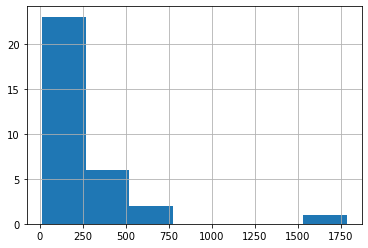

In [223]:
import matplotlib.pyplot as plt
#How does the distribution of likes look like
milan_venues['total likes'].hist(bins=7)
plt.show()

In [225]:
#These are our bins (i.e. 25% of venues has likes below 52.75, etc.)
mysmall = np.percentile(milan_venues['total likes'], 25)
mymedium = np.percentile(milan_venues['total likes'], 50)
myhigh = np.percentile(milan_venues['total likes'], 75)

print(mysmall)
print(mymedium)
print(myhigh)

52.75
129.5
325.5


In [140]:
#Let's categorize our likes!

low = milan_venues['total likes']<=mysmall
decent = milan_venues[(milan_venues['total likes']>mysmall) & (milan_venues['total likes']<=mymedium)]
good = milan_venues[(milan_venues['total likes']>mymedium) & (milan_venues['total likes']<=myhigh)]
delizioso = milan_venues['total likes']>myhigh

In [228]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=mysmall:
        return 'low'
    if s['total likes']<=mymedium:
        return 'decent'
    if s['total likes']<=myhigh:
        return 'good'
    if s['total likes']>myhigh:
        return 'delizioso'

milan_venues['likes_categ']=milan_venues.apply(conditions, axis=1)
milan_venues = milan_venues.drop('id', axis=1)

In [229]:
milan_venues

,name,categories,lat,lng,address,total likes,likes_categ
5,Pasticceria Marchesi,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II,154,good
6,Luini,Bakery,45.465707,9.191431,Via Santa Radegonda 16,1785,delizioso
12,Lavazza Coffee Design,Coffee Shop,45.466274,9.190975,"Piazza San Fedele, 2",148,good
13,VUN Andrea Aprea,Italian Restaurant,45.465290,9.189133,Via Silvio Pellico 3,18,low
17,Ristorante Trussardi alla Scala,Italian Restaurant,45.467036,9.189512,Piazza della Scala 5,73,decent
23,Panini Durini,Sandwich Place,45.465238,9.188590,Via Mengoni 4,116,decent
25,Signorvino,Wine Bar,45.464552,9.192885,P.zza Duomo,426,delizioso
26,Bulgari Lounge Bar,Cocktail Bar,45.470014,9.188943,Via Privata Fratelli Gabba,202,good
29,Starbucks Reserve Roastery,Coffee Shop,45.464920,9.186153,Piazza Cordusio 3,470,delizioso
30,Pasticceria Marchesi,Dessert Shop,45.468299,9.195018,"Via Montenapoleone, 9",314,good


In [230]:
#Let's redefine the categories of venues. Start with analyzing unique values.
milan_venues['categories'].unique()

array(['Pastry Shop', 'Bakery', 'Coffee Shop', 'Italian Restaurant',
       'Sandwich Place', 'Wine Bar', 'Cocktail Bar', 'Dessert Shop',
       'Bistro', 'Mediterranean Restaurant', 'Café',
       'Japanese Restaurant', 'Pizza Place', 'Lounge', 'Restaurant',
       'Korean Restaurant', 'Burger Joint'], dtype=object)

In [231]:
#These will be our new classification items

pizza = ['Pizza Place']
coffee = ['Coffee Shop','Pastry Shop','Bakery','Café']
italianfood = ['Italian Restaurant','Puglia Restaurant']
bars = ['Cocktail Bar','Bar','Wine Bar','Lounge']
fastfood = ['Sandwich Place','Burger Joint']
asianfood = ['Japanese Restaurant','Korean Restuarant']

def conditions2(s):
    if s['categories'] in pizza:
        return 'pizza'
    if s['categories'] in coffee:
        return 'coffee'
    if s['categories'] in italianfood:
        return 'italian food'
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in fastfood:
        return 'fastfood'
    if s['categories'] in asianfood:
        return 'asianfood'

milan_venues['categories_new']=milan_venues.apply(conditions2, axis=1)

In [237]:
#Using One Hot Encoding in order to "translate" categorical variables into numbers. OHC has been performed for two columns.
milan_onehot = pd.get_dummies(milan_venues[['categories_new', 'likes_categ']], prefix="", prefix_sep="")

#Adding name column back to dataframe
milan_onehot['Name'] = milan_venues['name'] 
fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

milan_onehot.head()

,Name,asianfood,bars,coffee,fastfood,italian food,pizza,decent,delizioso,good,low
5,Pasticceria Marchesi,0,0,1,0,0,0,0,0,1,0
6,Luini,0,0,1,0,0,0,0,1,0,0
12,Lavazza Coffee Design,0,0,1,0,0,0,0,0,1,0
13,VUN Andrea Aprea,0,0,0,0,1,0,0,0,0,1
17,Ristorante Trussardi alla Scala,0,0,0,0,1,0,1,0,0,0


In [239]:
cluster_df = milan_onehot.drop('Name', axis=1)

#We will cluster our dataframe into four clusters
k_clusters = 4

#Consolidating our data into clusters
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

#See if we have clusters assigned for first five rows
kmeans.labels_[0:5]

array([1, 0, 1, 2, 3])

In [240]:
milan_venues['label'] = kmeans.labels_
milan_venues.head()

,name,categories,lat,lng,address,total likes,likes_categ,categories_new,label
5,Pasticceria Marchesi,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II,154,good,coffee,1
6,Luini,Bakery,45.465707,9.191431,Via Santa Radegonda 16,1785,delizioso,coffee,0
12,Lavazza Coffee Design,Coffee Shop,45.466274,9.190975,"Piazza San Fedele, 2",148,good,coffee,1
13,VUN Andrea Aprea,Italian Restaurant,45.465290,9.189133,Via Silvio Pellico 3,18,low,italian food,2
17,Ristorante Trussardi alla Scala,Italian Restaurant,45.467036,9.189512,Piazza della Scala 5,73,decent,italian food,3


In [244]:
#Visualizing our clusters with Milan folium map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15,width='90%', height='70%')

#Some colors to be used
rainbow = ['red','blue','green','yellow','darkpurple','black']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milan_venues['lat'], milan_venues['lng'], milan_venues['name'], milan_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster #' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3><b>4. Results</b></h3>
<br>
We can see that food venues in Milan have been divided into four different clusters based on the category and total likes of users using Foursquare. In next cells I will analyze and briefly describe each of the cluster. 

If we take a look at the map above, we can see that there is no correlation between the quality (# of likes) of the venue and distance to Centro Storico (Duomo di Milano). It is a good tip for visitors, that even close to the city center, they can still find a good meal or lunch nearby.

* The first cluster (label 0) is showing us the best places in a radius of 1000 ft from Milan City Center. This is represented mainly by coffee and wine bars which seems to be the most popular venues for italian and tourists.
* The second cluster (label 1) contains venues that are still quite popular and well-rated along Foursquare users. Once again we can observe that these are mainly coffee shops and pastries/bakeries.
* The third cluster (label 2) is based of mainly restaurants, which doesn't seem to be as popular venues to spend time in compared to first two clusters. It can also indicate, that italians prefer their home food rather than the one in the restaurants.
* The fourth cluster (label 3) is the least attractive for the customers. It is rated within the average, but certainly we can find better places to eat or have lunch in.

In [245]:
milan_venues.loc[milan_venues['label']==0]

,name,categories,lat,lng,address,total likes,likes_categ,categories_new,label
6,Luini,Bakery,45.465707,9.191431,Via Santa Radegonda 16,1785,delizioso,coffee,0
25,Signorvino,Wine Bar,45.464552,9.192885,P.zza Duomo,426,delizioso,bars,0
29,Starbucks Reserve Roastery,Coffee Shop,45.464920,9.186153,Piazza Cordusio 3,470,delizioso,coffee,0
51,Il Salumaio di Montenapoleone,Italian Restaurant,45.469880,9.194600,"Via Santo Spirito, 10",448,delizioso,italian food,0
65,Nobu,Japanese Restaurant,45.470974,9.192958,Via Manzoni 31,360,delizioso,asianfood,0
70,Paper Moon,Pizza Place,45.467403,9.196873,"Via Bagutta, 1",520,delizioso,pizza,0
91,Piz,Pizza Place,45.462163,9.185767,Via Torino 34,440,delizioso,pizza,0
98,Dolce & Gabbana Martini Bar,Cocktail Bar,45.468296,9.198412,Corso Venezia 15,698,delizioso,bars,0


In [246]:
milan_venues.loc[milan_venues['label']==1]

,name,categories,lat,lng,address,total likes,likes_categ,categories_new,label
5,Pasticceria Marchesi,Pastry Shop,45.465612,9.190091,Galleria Vittorio Emanuele II,154,good,coffee,1
12,Lavazza Coffee Design,Coffee Shop,45.466274,9.190975,"Piazza San Fedele, 2",148,good,coffee,1
26,Bulgari Lounge Bar,Cocktail Bar,45.470014,9.188943,Via Privata Fratelli Gabba,202,good,bars,1
30,Pasticceria Marchesi,Dessert Shop,45.468299,9.195018,"Via Montenapoleone, 9",314,good,None,1
57,Armani Bamboo Bar,Cocktail Bar,45.470483,9.192785,Via Alessandro Manzoni 31,245,good,bars,1
74,Giovanni Cova & C.,Bakery,45.468816,9.184121,via Cusani 10,146,good,coffee,1
85,Signorvino,Wine Bar,45.467153,9.183460,Via Dante 13 15,183,good,bars,1
90,Terrazza Martini,Lounge,45.461876,9.190257,"Piazza Armando Diaz, 7",140,good,bars,1


In [247]:
milan_venues.loc[milan_venues['label']==2]

,name,categories,lat,lng,address,total likes,likes_categ,categories_new,label
13,VUN Andrea Aprea,Italian Restaurant,45.465290,9.189133,Via Silvio Pellico 3,18,low,italian food,2
62,La Veranda,Mediterranean Restaurant,45.469293,9.195544,"Via Gesù, 6/8",52,low,None,2
64,Caffè Napoli,Café,45.462816,9.189023,Via Gaetano Giardino 1,13,low,coffee,2
72,Il Giardino,Lounge,45.469989,9.188872,Via Privata Fratelli Gabba 7b,13,low,bars,2
75,Bvlgari Ristorante,Restaurant,45.470005,9.188943,Via Privata Fratelli Gabba,35,low,None,2
77,Hana,Korean Restaurant,45.462380,9.188521,"Via Giuseppe Mazzini, 12",40,low,None,2
84,Il Foyer,Lounge,45.469463,9.195348,"Via Gesù, 6/8",18,low,bars,2
94,Five Guys,Burger Joint,45.466119,9.196628,"Corso Vittorio Emanuele II, 37",45,low,fastfood,2


In [248]:
milan_venues.loc[milan_venues['label']==3]

,name,categories,lat,lng,address,total likes,likes_categ,categories_new,label
17,Ristorante Trussardi alla Scala,Italian Restaurant,45.467036,9.189512,Piazza della Scala 5,73,decent,italian food,3
23,Panini Durini,Sandwich Place,45.465238,9.188590,Via Mengoni 4,116,decent,fastfood,3
31,Nespresso,Coffee Shop,45.465428,9.193850,Piazza del Liberty,105,decent,coffee,3
36,Langosteria Café,Bistro,45.464760,9.194899,Galleria Del Corso,53,decent,None,3
53,Bice,Italian Restaurant,45.470152,9.194140,Via Borgospesso 12,101,decent,italian food,3
68,Ladurée,Dessert Shop,45.463586,9.187239,Via Spadari 6,119,decent,None,3
73,Andry,Italian Restaurant,45.467240,9.184450,"Via Rovello, 10",98,decent,italian food,3
92,Risoelatte,Italian Restaurant,45.466514,9.183262,"Via Manfredo Camperio, 6",98,decent,italian food,3


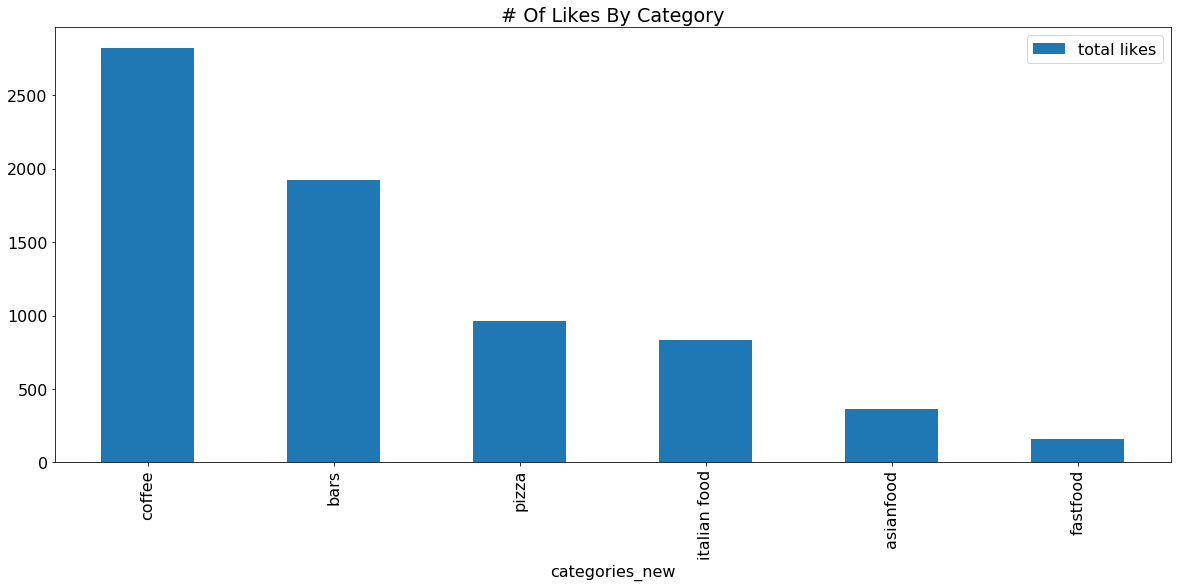

<Figure size 720x288 with 0 Axes>

In [321]:
milan01 = milan_venues.groupby("categories_new")["total likes"].sum()
mydf01 = pd.DataFrame(milan01).sort_values('total likes',ascending=False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 16})


mydf01.plot.bar(title = "# Of Likes By Category")

plt.figure(figsize=(10,4))

plt.show()

<h3><b>5. Discussion</b></h3>
<br>

After analysis we can have a couple of observations. First one, which is in line with the expectations, is that the highest-rated venues on the food market in Milan, are coffee shops and dessert/pasteries places. We can think that italians prefer they home food rather than eating in the city center. It looks like the neighbourhood of Duomo di Milano can be a good place for a coffee or drink, but for dinner it is better to either eat at home or look for a restaurant further from Centro Storico.

Another observation is that even close to the city center, you can still find places that are highly rated by tourists and italians. Some could think that the more popular the neighbourhood is, the worse food and drinks will be. The analysis we performed proved opposite.

We could also consider that in the report we may have some noise (bias), because we are not able to tell what nationality and home country was of the persons who were rating the venues. There are some cultural differences between nations and - according to the stereotype - italians will most likely higher rate the coffee shop rather than restaurant.

<h3><b>6. Conclusion</b></h3>
<br>
The analysis goal has been met. Materials from the above steps can be used in various ways. Future enterprenours may see the clusters on the map which can tell in which area of Milan there is lack of food-venues with a good quality service. Other benefit is for tourists visiting Milan and Milan citizens, who will get rid of a stereotype that close to the Duomo Di Milano there are no nice restaurants or coffee shops.